In [1]:
import torch
import autograd.numpy as np
from autograd import grad
from autograd.numpy import log, sqrt, sin, cos, exp, pi, prod
from autograd.numpy.random import normal, uniform

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import fractions as f
from scipy.integrate import dblquad

device = torch.device("cuda")

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

In [3]:
#负对数似然函数
def mixture(x):
    energy = ((x[0]**2 + x[1]**2)/10 - (cos(1.2*pi*x[0]) + cos(1.2*pi*x[1]))) / 0.3
    regularizer = ((x[0]**2 + x[1]**2) > 7) * ((x[0]**2 + x[1]**2) - 7)
    return energy + regularizer

In [4]:
def mixture_expand(x, y): return mixture([x, y])
#原始函数
def function_plot(x, y): return np.exp(-mixture([x, y]))

In [5]:
boundary_ = 2.5
axis_x = np.linspace(-boundary_, boundary_, 500)
axis_y = np.linspace(-boundary_, boundary_, 500)
axis_X, axis_Y = np.meshgrid(axis_x, axis_y)

energy_grid = mixture_expand(axis_X, axis_Y)
prob_grid = function_plot(axis_X, axis_Y)
lower_bound, upper_bound = np.min(energy_grid) - 1, np.max(energy_grid) + 1

In [12]:
class Sampler:
    def __init__(self, f=None, dim=None, boundary=None, xinit=None, partition=None, lr=0.1, T=1.0, zeta=1, decay_lr=100., parts=100):

        self.f = f
        self.dim = dim
        self.lr = lr
        self.T = T
        self.partition = partition
        self.boundary = boundary
        self.xinit = np.array(xinit)
        self.zeta = zeta
        self.decay_lr = decay_lr
        self.parts = parts
             
        # baseline SGLD
        self.sgld_beta = self.xinit
             
        # baseline irr
        self.irr_beta1 = self.xinit
        self.irr_beta2 = self.xinit
        self.irr_beta3 = self.xinit 
        self.irr_beta4 = self.xinit  
        self.irr_beta5 = self.xinit
        self.irr_beta6 = self.xinit
        self.irr_beta7 = self.xinit 
        self.irr_beta8 = self.xinit           
   
    def in_domain(self, beta): return sum(map(lambda i: beta[i] < self.boundary[0] or beta[i] > self.boundary[1], range(self.dim))) == 0

    def stochastic_grad(self, beta): 
        return grad(self.f)(beta) + 0.32*normal(size=self.dim)

    def sum_absolute_values(self, vector):
        absolute_vector = np.abs(vector)
        result = np.sum(absolute_vector)
        return result

    def create_antisymmetric_matrix(self):
        matrix = np.array([[0] * self.dim for _ in range(self.dim)])
        for i in range(self.dim):
            for j in range(i + 1, self.dim):
                matrix[i][j] =  1
                matrix[j][i] = -matrix[i][j]
        return matrix


    def stochastic_f(self, beta): return self.f(beta.tolist()) + 0.32*normal(size=1)

    def sgld_step(self):
    
        proposal = self.sgld_beta - self.lr * (self.stochastic_grad(self.sgld_beta)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.sgld_beta = proposal
                                                   
    def irr_step1(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta1 - self.lr * (np.eye(self.dim)+0.5*A)@(self.stochastic_grad(self.irr_beta1)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta1 = proposal

    def irr_step2(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta2 - self.lr * (np.eye(self.dim)+1*A)@(self.stochastic_grad(self.irr_beta2)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta2 = proposal

    def irr_step3(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta3 - self.lr * (np.eye(self.dim)+2*A)@(self.stochastic_grad(self.irr_beta3)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta3 = proposal

    def irr_step4(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta4 - self.lr * (np.eye(self.dim)+3*A)@(self.stochastic_grad(self.irr_beta4)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta4 = proposal
    
    def irr_step5(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta5 - self.lr * (np.eye(self.dim)+4*A)@(self.stochastic_grad(self.irr_beta5)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta5 = proposal

    def irr_step6(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta6 - self.lr * (np.eye(self.dim)+5*A)@(self.stochastic_grad(self.irr_beta6)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta6 = proposal

    def irr_step7(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta7 - self.lr * (np.eye(self.dim)+6*A)@(self.stochastic_grad(self.irr_beta7)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta7 = proposal

    def irr_step8(self,A):#温度取0.5，1，2，3
    
        proposal = self.irr_beta8 - self.lr * (np.eye(self.dim)+7*A)@(self.stochastic_grad(self.irr_beta8)) + sqrt(2 * self.lr * self.T) * normal(size=self.dim)
        
        if self.in_domain(proposal):
            self.irr_beta8 = proposal

In [8]:
zeta = 0.75
sampler = Sampler(f=mixture, dim=2, boundary=[-boundary_, boundary_], xinit=[2.,2.], \
                  partition=[lower_bound, upper_bound], lr=1e-3, T=1, zeta=zeta, decay_lr=3e-3, parts=100)

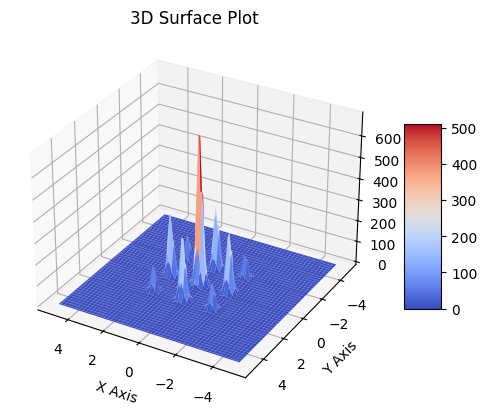

In [9]:
# Generate some sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = function_plot(X, Y)

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Surface Plot')

# Adjust the viewing angle
ax.view_init(elev=30, azim=120)

# Show the plot
plt.show()

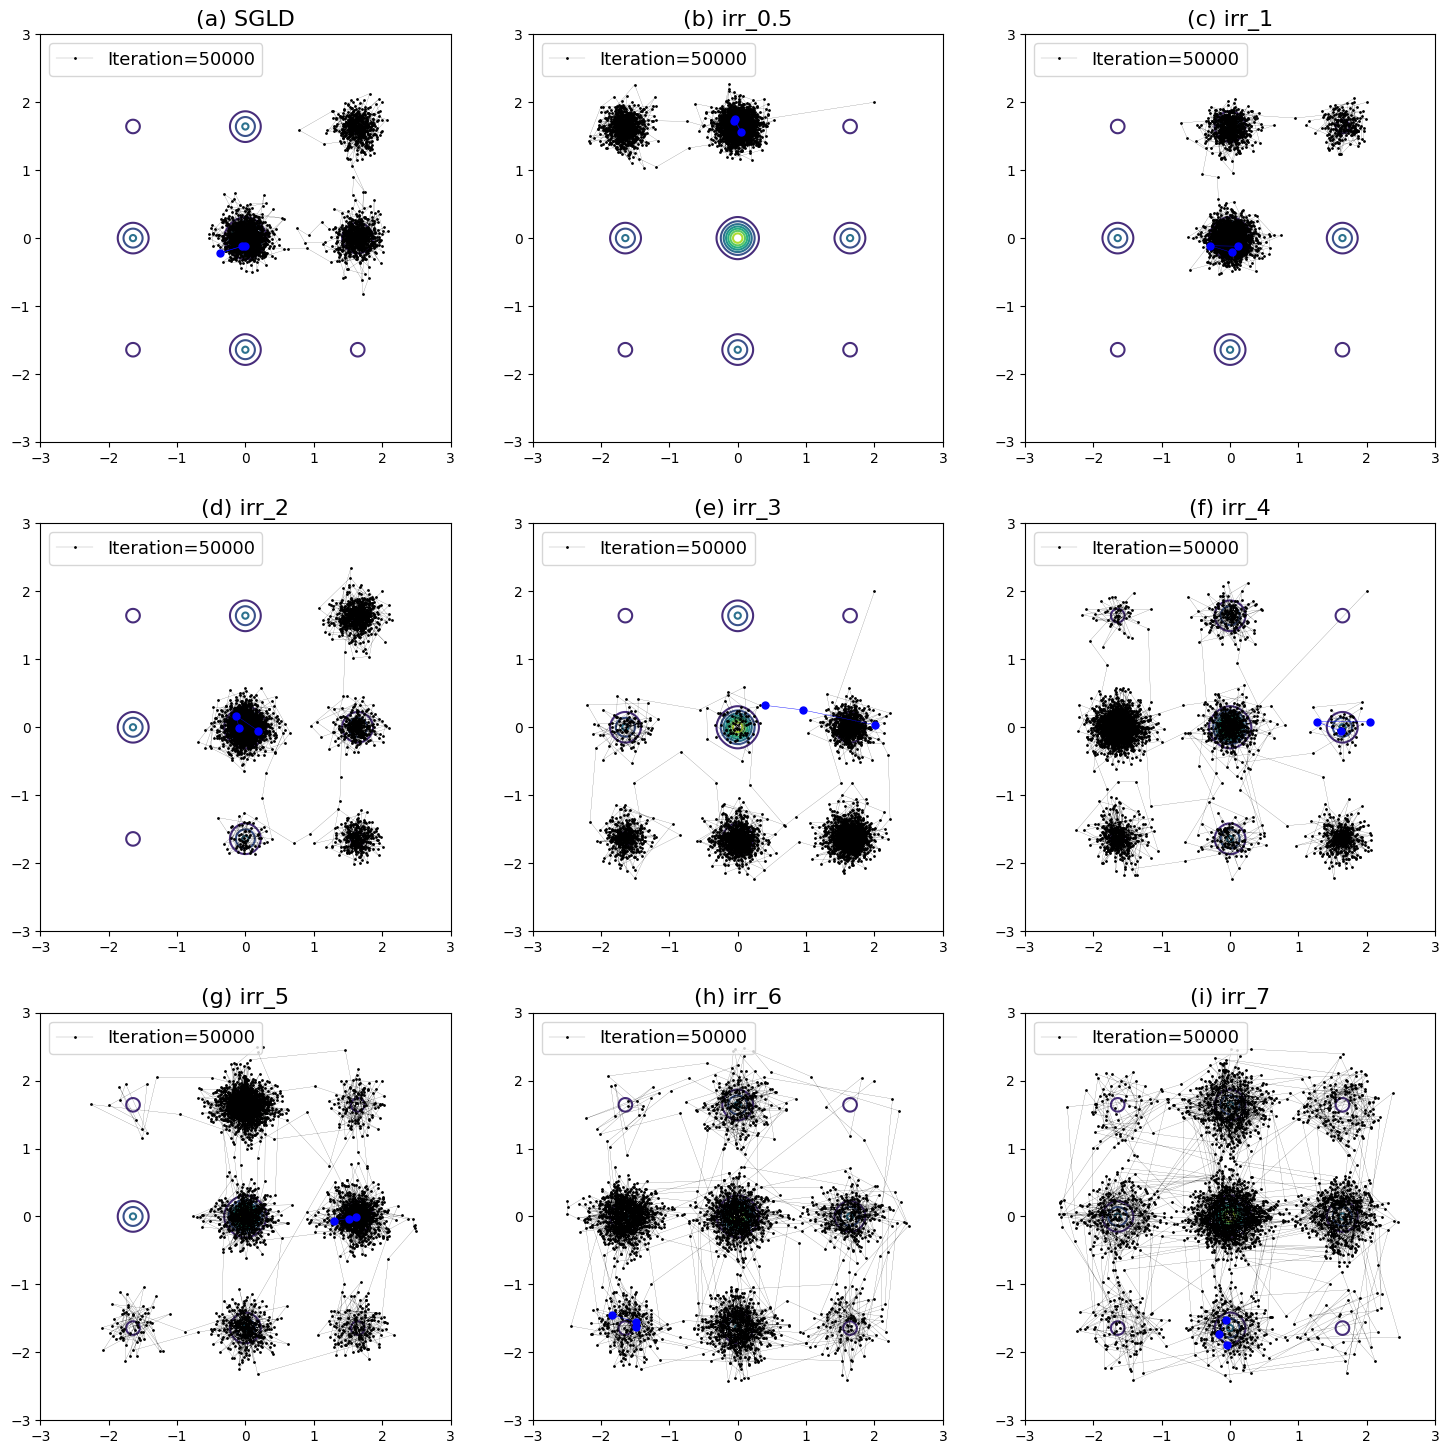

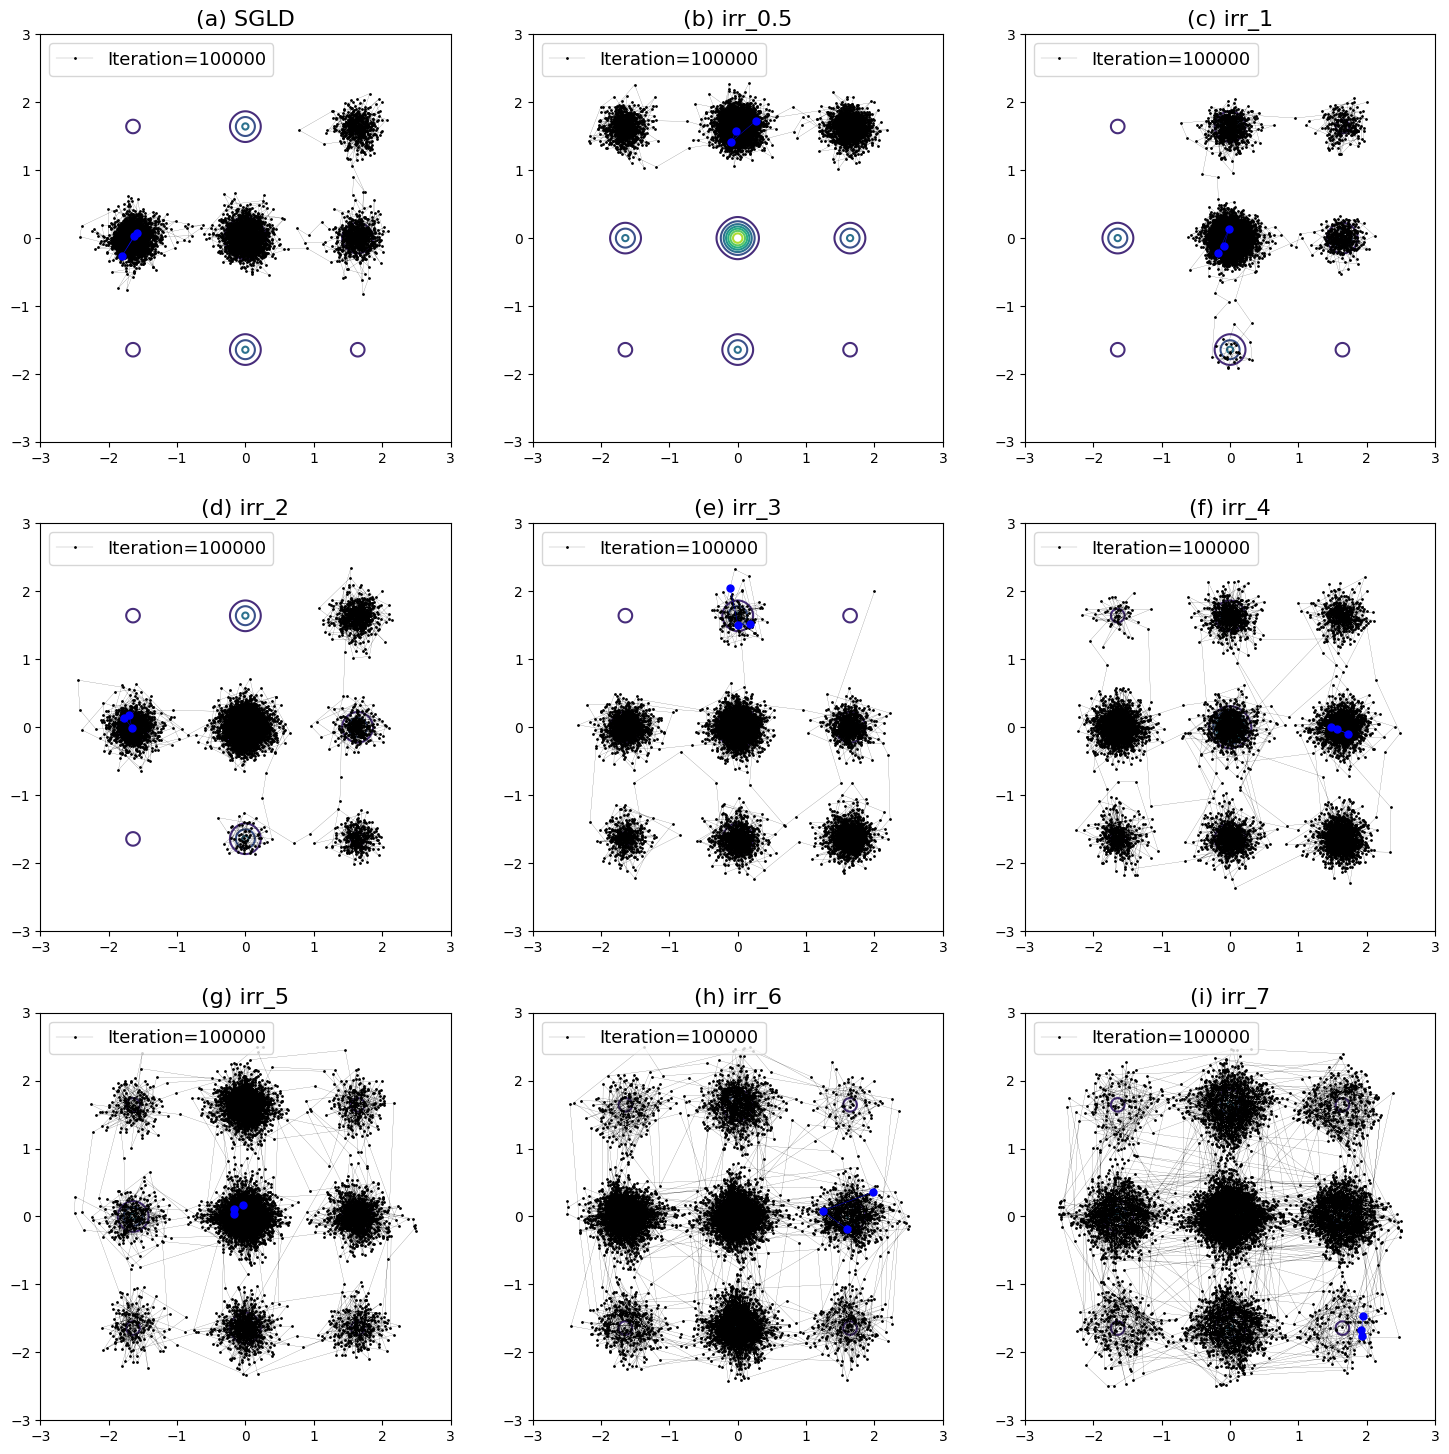

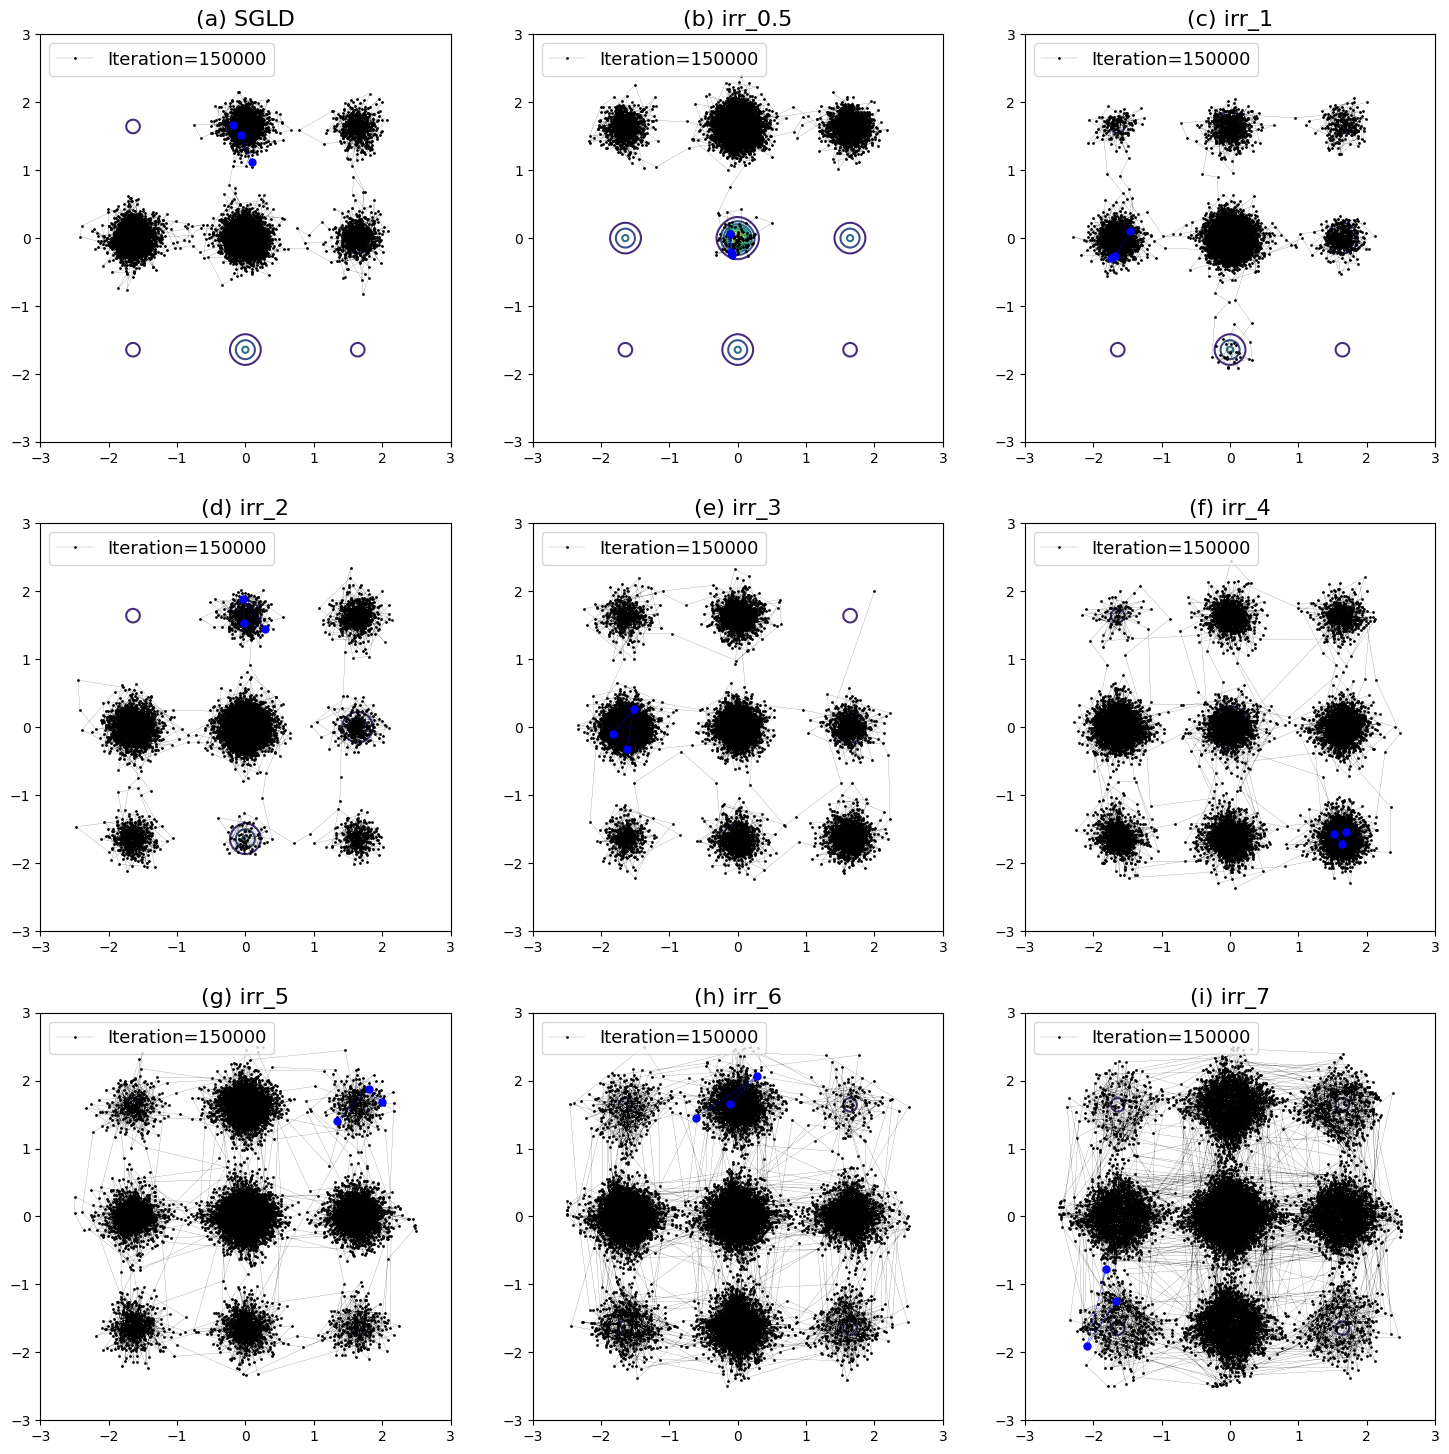

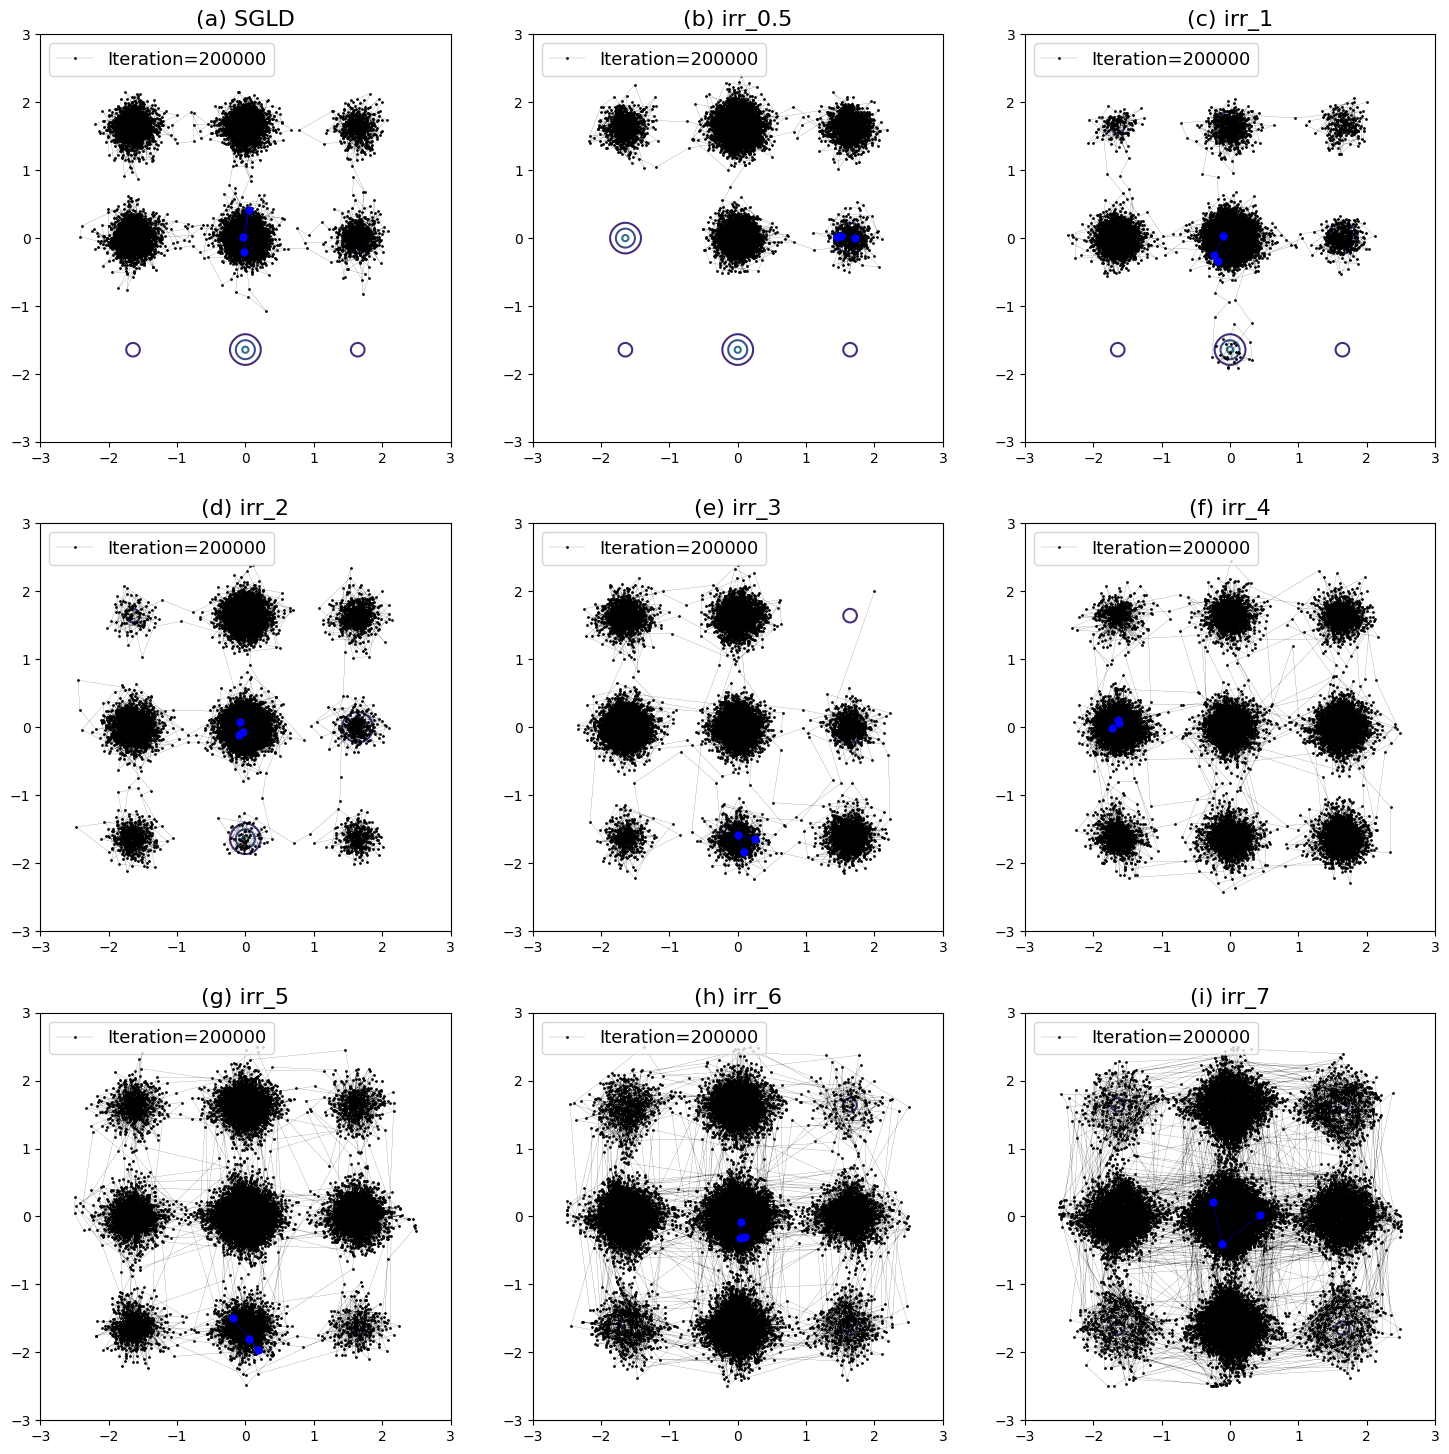

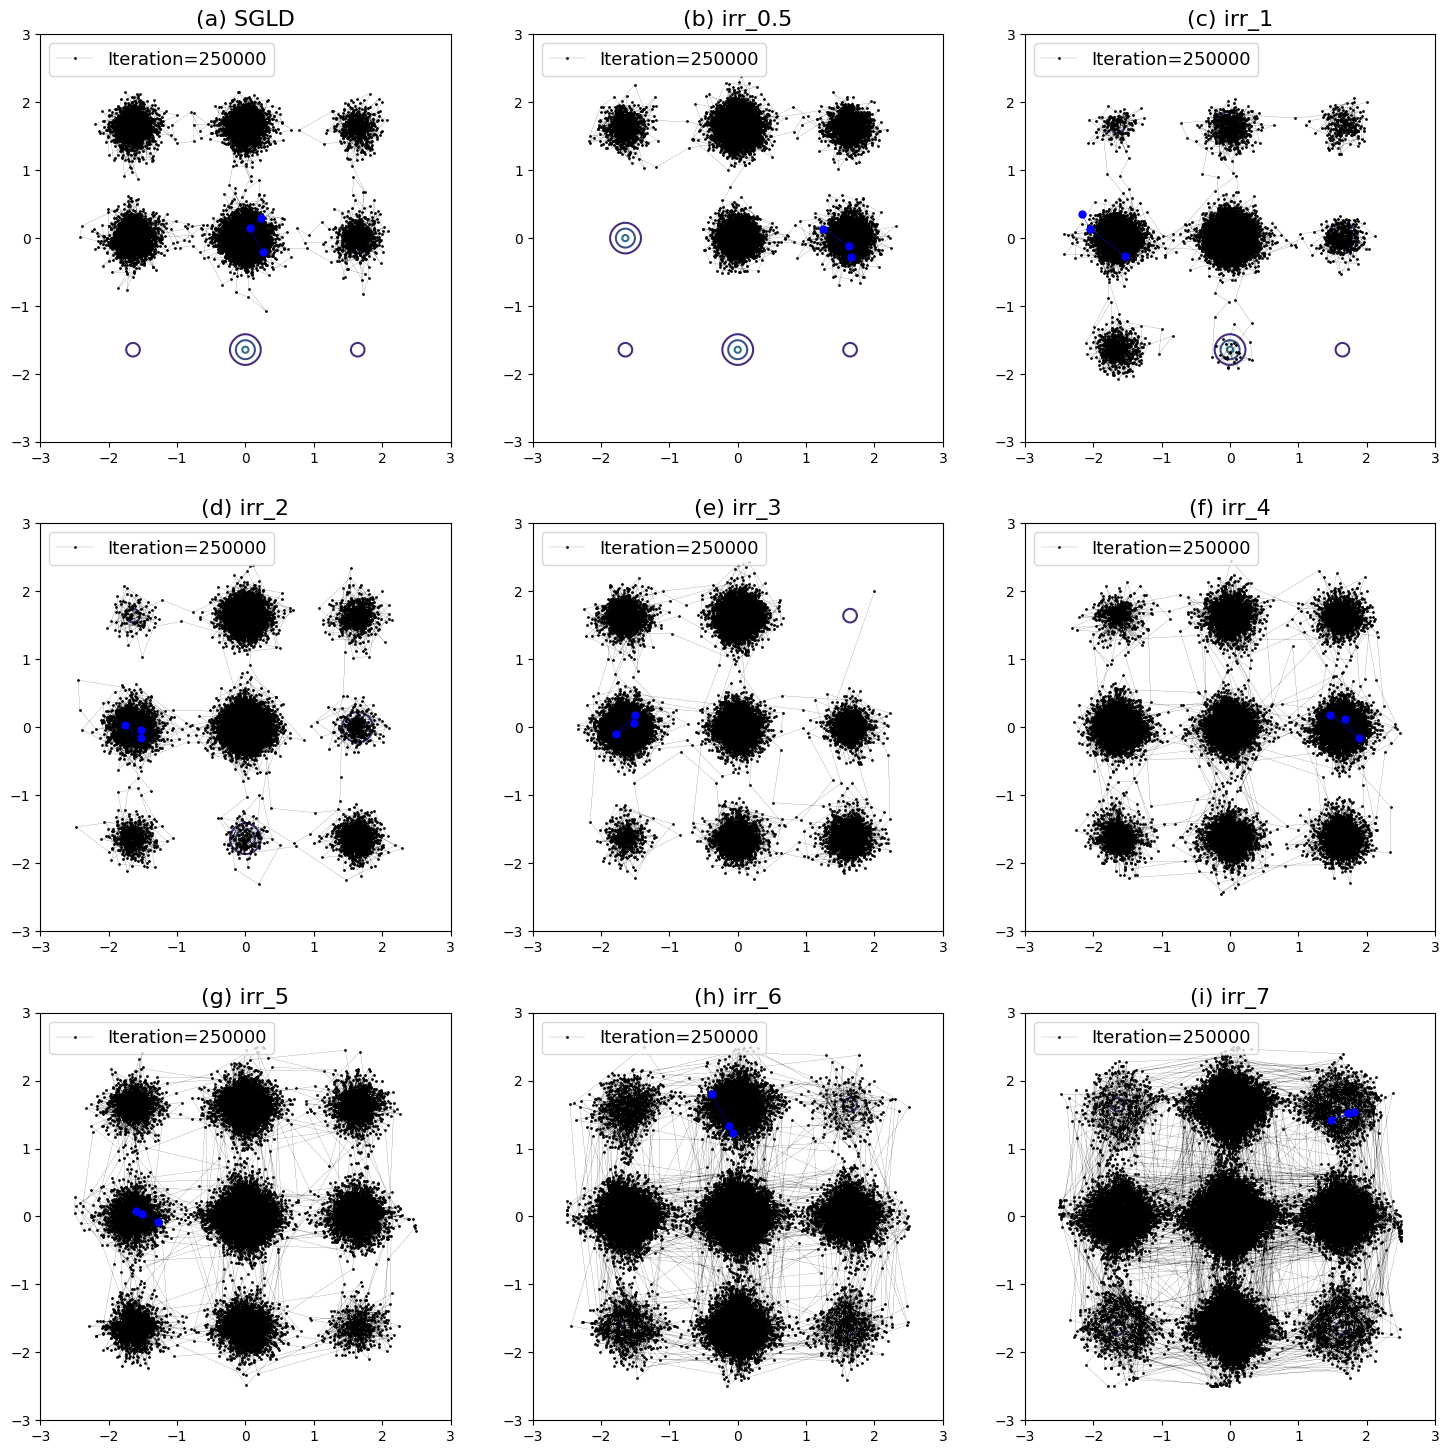

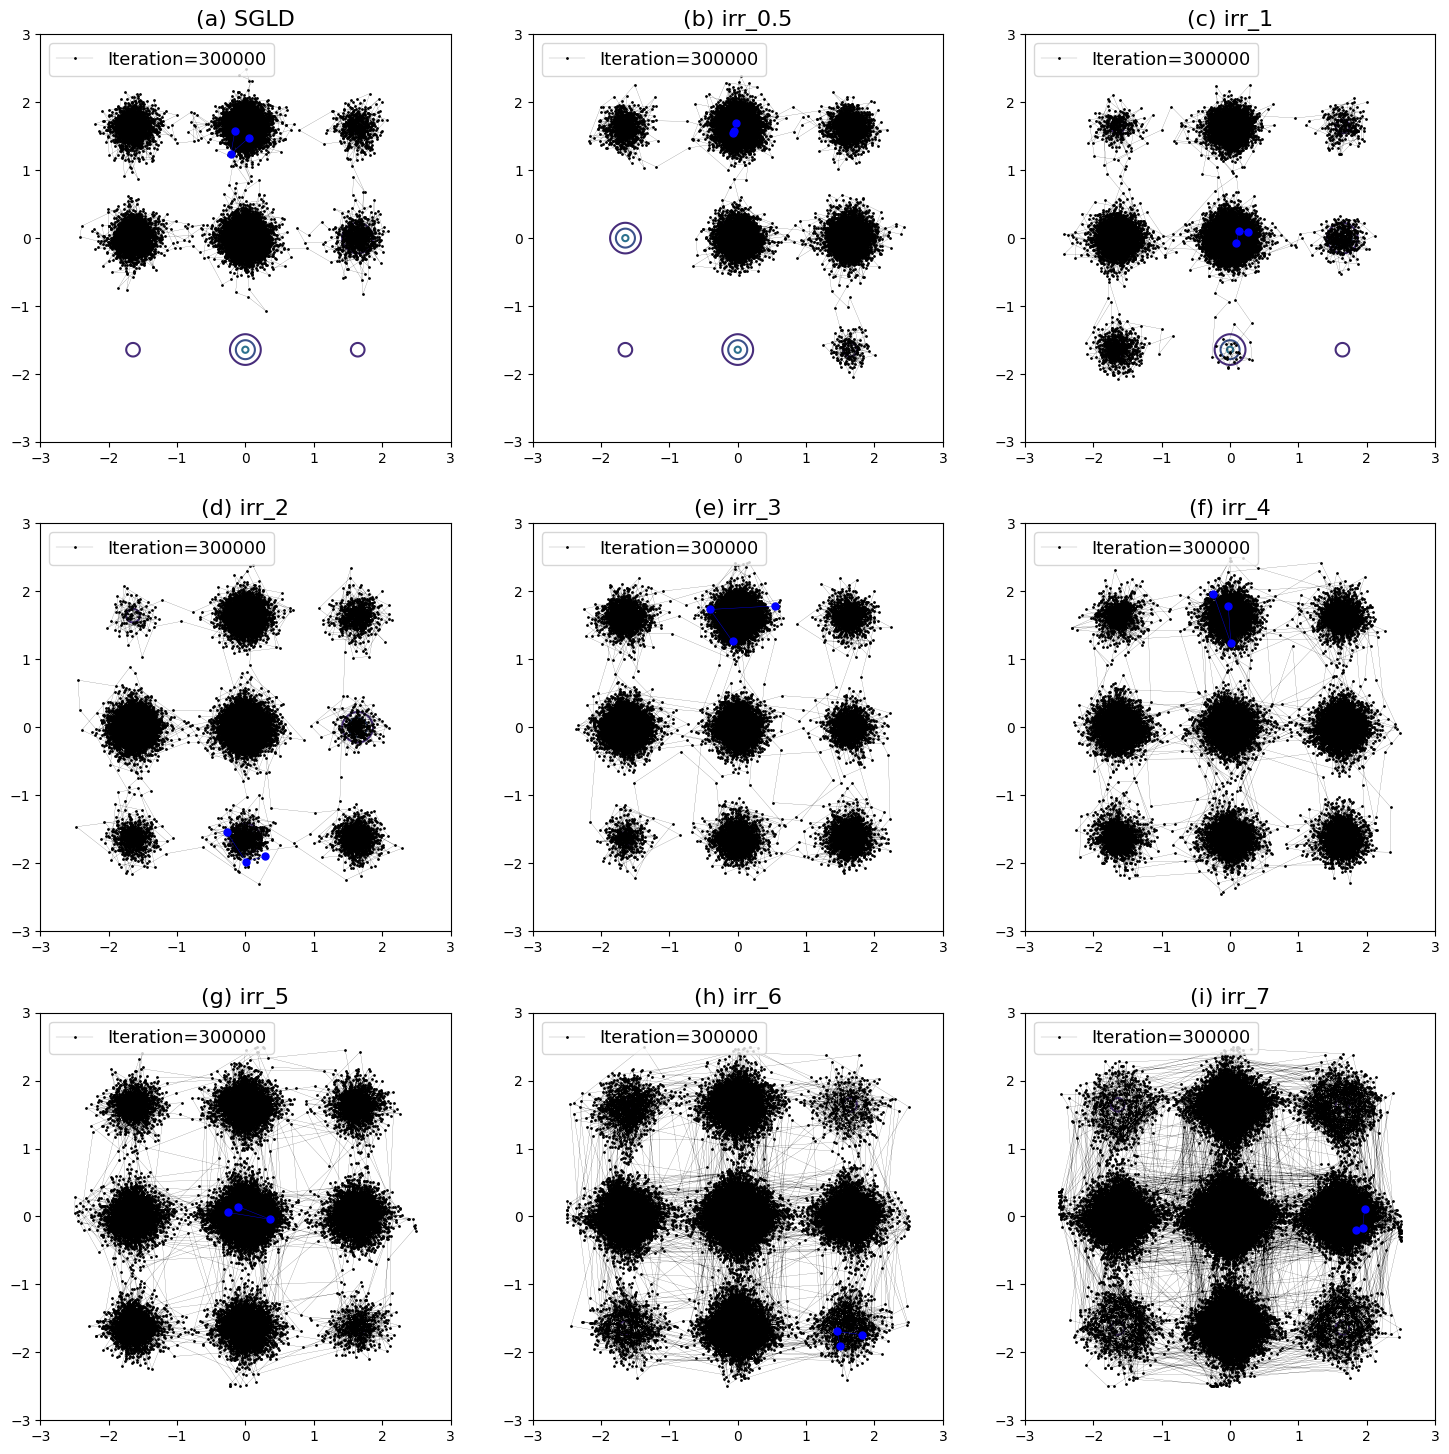

<Figure size 1800x1800 with 0 Axes>

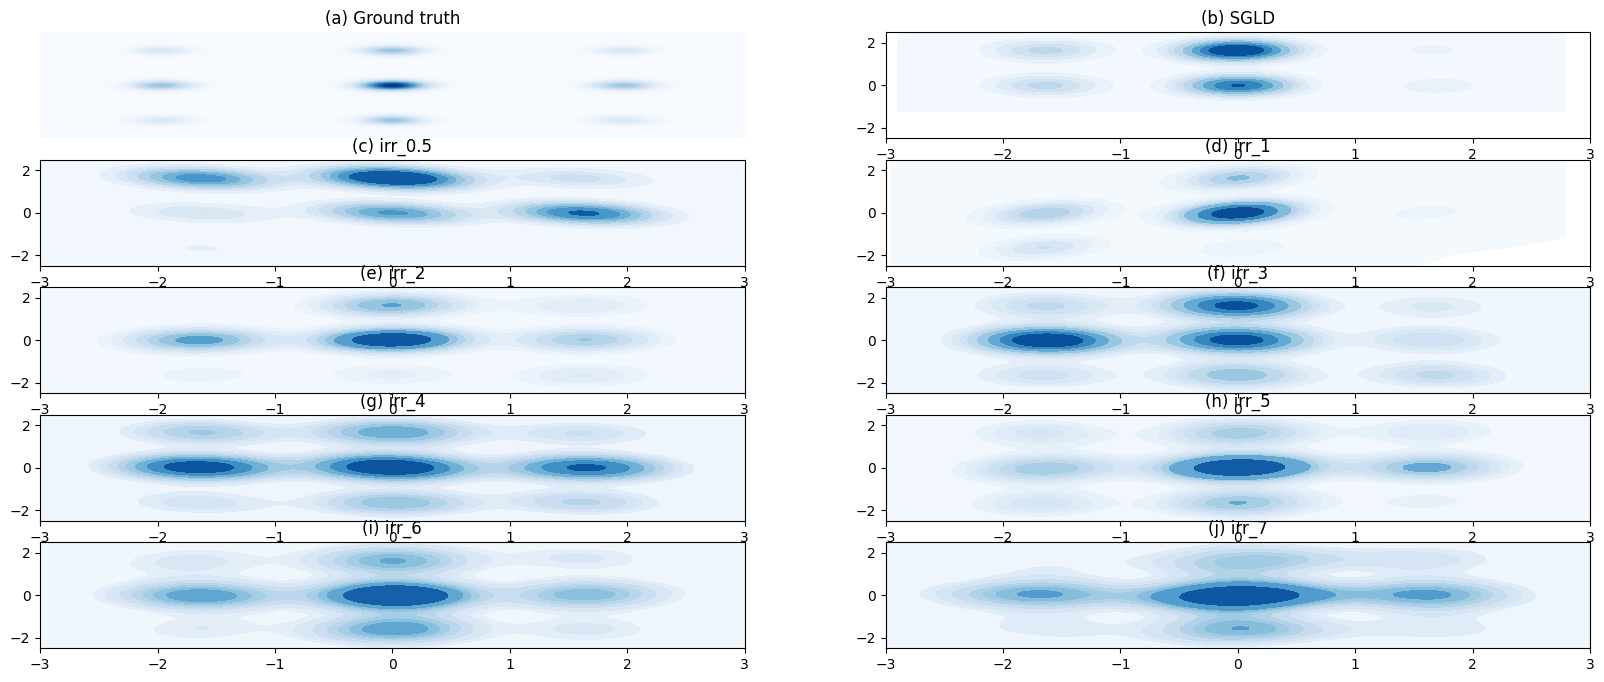

In [13]:
warm_up = 5000
split_ = 20
sgld_x = np.array([sampler.sgld_beta])
irr_x1 = np.array([sampler.irr_beta1])
irr_x2 = np.array([sampler.irr_beta2])
irr_x3 = np.array([sampler.irr_beta3])
irr_x4 = np.array([sampler.irr_beta4])
irr_x5 = np.array([sampler.irr_beta5])
irr_x6 = np.array([sampler.irr_beta6])
irr_x7 = np.array([sampler.irr_beta7])
irr_x8 = np.array([sampler.irr_beta8])

jump_col = ['blue', 'red']

A = sampler.create_antisymmetric_matrix()

for iters in range(400000):

    sampler.sgld_step()
    sampler.irr_step1(A)
    sampler.irr_step2(A)
    sampler.irr_step3(A)
    sampler.irr_step4(A)
    sampler.irr_step5(A)
    sampler.irr_step6(A)
    sampler.irr_step7(A)
    sampler.irr_step8(A)

    if iters > warm_up:
        if iters % split_ == 0:
            sgld_x = np.vstack((sgld_x, sampler.sgld_beta))
            irr_x1 = np.vstack((irr_x1, sampler.irr_beta1))
            irr_x2 = np.vstack((irr_x2, sampler.irr_beta2))
            irr_x3 = np.vstack((irr_x3, sampler.irr_beta3))
            irr_x4 = np.vstack((irr_x4, sampler.irr_beta4))
            irr_x5 = np.vstack((irr_x5, sampler.irr_beta5))
            irr_x6 = np.vstack((irr_x6, sampler.irr_beta6))
            irr_x7 = np.vstack((irr_x7, sampler.irr_beta7))
            irr_x8 = np.vstack((irr_x8, sampler.irr_beta8))
               
        if iters % 50000==0:
            fig = plt.figure(figsize=(18,18))
            
            plt.subplot(3, 3, 1).set_title('(a) SGLD', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(sgld_x[:,0][:-3], sgld_x[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(sgld_x[:,0][-3:], sgld_x[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13}) 
            
            plt.subplot(3, 3, 2).set_title('(b) irr_0.5', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x1[:,0][:-3], irr_x1[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x1[:,0][-3:], irr_x1[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})

            plt.subplot(3, 3, 3).set_title('(c) irr_1', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x2[:,0][:-3], irr_x2[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x2[:,0][-3:], irr_x2[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})

            plt.subplot(3, 3, 4).set_title('(d) irr_2', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x3[:,0][:-3], irr_x3[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x3[:,0][-3:], irr_x3[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})

            plt.subplot(3, 3, 5).set_title('(e) irr_3', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x4[:,0][:-3], irr_x4[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x4[:,0][-3:], irr_x4[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})
                
            plt.subplot(3, 3, 6).set_title('(f) irr_4', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x5[:,0][:-3], irr_x5[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x5[:,0][-3:], irr_x5[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})

            plt.subplot(3, 3, 7).set_title('(g) irr_5', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x6[:,0][:-3], irr_x6[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x6[:,0][-3:], irr_x6[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})

            plt.subplot(3, 3, 8).set_title('(h) irr_6', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x7[:,0][:-3], irr_x7[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x7[:,0][-3:], irr_x7[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})

            plt.subplot(3, 3, 9).set_title('(i) irr_7', fontsize=16)
            plt.contour(axis_X, axis_Y, prob_grid)
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.plot(irr_x8[:,0][:-3], irr_x8[:,1][:-3], linewidth=0.1, marker='.', markersize=2, color='k', label="Iteration="+str(iters))
            plt.plot(irr_x8[:,0][-3:], irr_x8[:,1][-3:], linewidth=0.3, marker='.', markersize=10, color=jump_col[0], alpha=1);
            plt.legend(loc="upper left", prop={'size': 13})
                
plt.clf() #clear figure

fig = plt.figure(figsize=(8, 20))

plt.subplot(5, 2, 1).set_title('(a) Ground truth')
sns.heatmap(prob_grid, cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)

plt.subplot(5, 2, 2).set_title('(b) SGLD')
ax = sns.kdeplot(x = sgld_x[:,0][::split_], y = sgld_x[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 3).set_title('(c) irr_0.5')
ax = sns.kdeplot(x = irr_x1[:,0][::split_], y = irr_x1[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 4).set_title('(d) irr_1')
ax = sns.kdeplot(x = irr_x2[:,0][::split_], y = irr_x2[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 5).set_title('(e) irr_2')
ax = sns.kdeplot(x = irr_x3[:,0][::split_], y = irr_x3[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 6).set_title('(f) irr_3')
ax = sns.kdeplot(x = irr_x4[:,0][::split_], y = irr_x4[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 7).set_title('(g) irr_4')
ax = sns.kdeplot(x = irr_x5[:,0][::split_], y = irr_x5[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 8).set_title('(h) irr_5')
ax = sns.kdeplot(x = irr_x6[:,0][::split_], y = irr_x6[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 9).set_title('(i) irr_6')
ax = sns.kdeplot(x = irr_x7[:,0][::split_], y = irr_x7[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 10).set_title('(j) irr_7')
ax = sns.kdeplot(x = irr_x8[:,0][::split_], y = irr_x8[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.show()



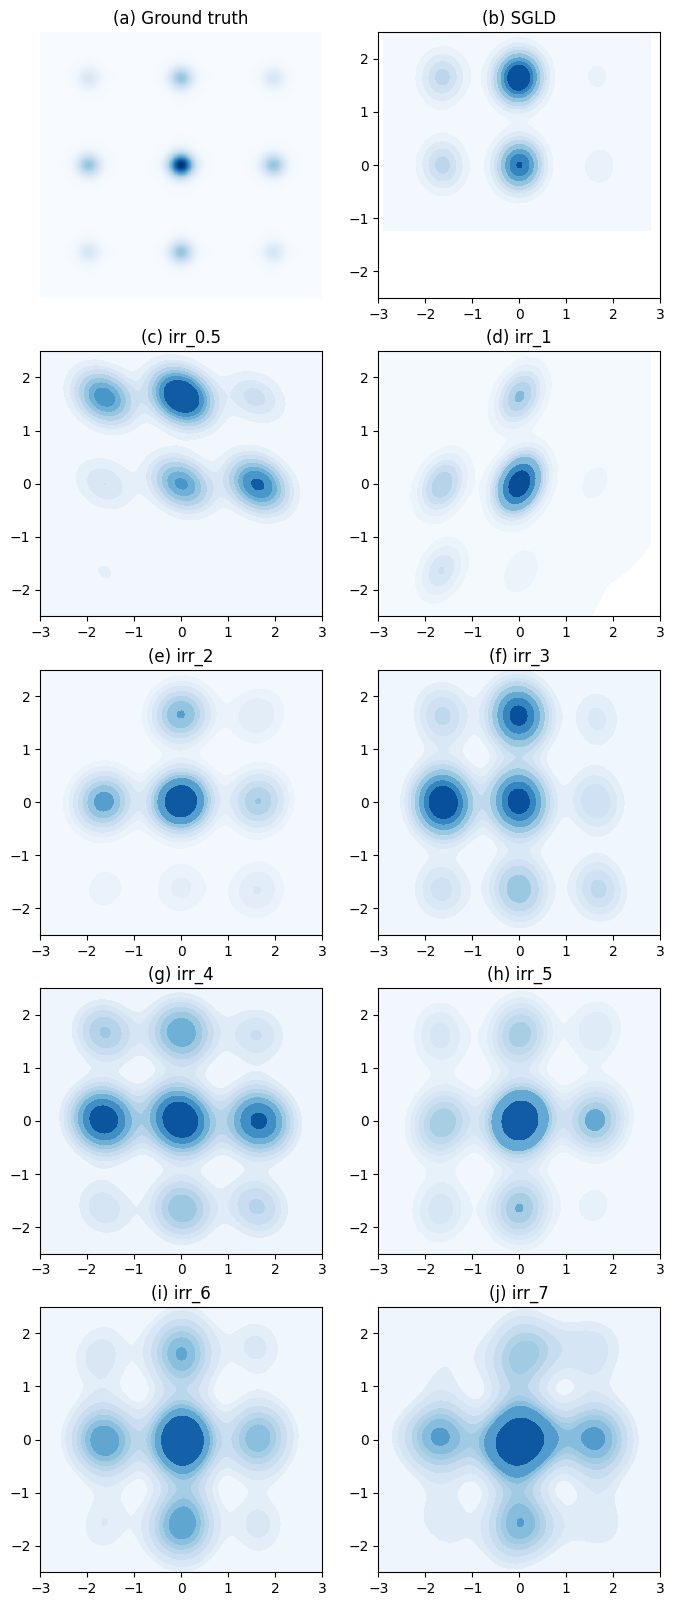

In [14]:
fig = plt.figure(figsize=(8, 20))

plt.subplot(5, 2, 1).set_title('(a) Ground truth')
sns.heatmap(prob_grid, cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)

plt.subplot(5, 2, 2).set_title('(b) SGLD')
ax = sns.kdeplot(x = sgld_x[:,0][::split_], y = sgld_x[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 3).set_title('(c) irr_0.5')
ax = sns.kdeplot(x = irr_x1[:,0][::split_], y = irr_x1[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 4).set_title('(d) irr_1')
ax = sns.kdeplot(x = irr_x2[:,0][::split_], y = irr_x2[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 5).set_title('(e) irr_2')
ax = sns.kdeplot(x = irr_x3[:,0][::split_], y = irr_x3[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 6).set_title('(f) irr_3')
ax = sns.kdeplot(x = irr_x4[:,0][::split_], y = irr_x4[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 7).set_title('(g) irr_4')
ax = sns.kdeplot(x = irr_x5[:,0][::split_], y = irr_x5[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 8).set_title('(h) irr_5')
ax = sns.kdeplot(x = irr_x6[:,0][::split_], y = irr_x6[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 9).set_title('(i) irr_6')
ax = sns.kdeplot(x = irr_x7[:,0][::split_], y = irr_x7[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.subplot(5, 2, 10).set_title('(j) irr_7')
ax = sns.kdeplot(x = irr_x8[:,0][::split_], y = irr_x8[:,1][::split_], cmap="Blues", fill=True, thresh=False)
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_ylim(-boundary_, boundary_)

plt.show()

In [10]:
def kl_divergence_discrete(p, q):
    p_smoothed = p + 1e-10
    q_smoothed = q + 1e-10
    return np.sum(p_smoothed * np.log1p(p_smoothed / q_smoothed))


# 定义离散化的区域和网格
x_bins = np.linspace(-2,4,300)
y_bins = np.linspace(-2,4,300)


In [11]:
# 计算每个网格单元的概率
grid_probabilities = np.zeros((len(x_bins) - 1, len(y_bins) - 1))

for i in range(len(x_bins) - 1):
    for j in range(len(y_bins) - 1):
        x_lower = x_bins[i]
        x_upper = x_bins[i + 1]
        y_lower = y_bins[j]
        y_upper = y_bins[j + 1]


        probability, _ = dblquad(function_plot, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper)
        grid_probabilities[i, j] = probability

        
#归一化
total = np.sum(grid_probabilities)
for i in range(len(x_bins) - 1):
    for j in range(len(y_bins) - 1):
        grid_probabilities[i, j] = grid_probabilities[i, j]/total
# 输出不同网格下的概率
print("不同网格下的概率:\n", grid_probabilities)
np.save('grid_probabilities.npy', grid_probabilities)

不同网格下的概率:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#把结果存到本地

import pickle
grid_probabilities = np.load('grid_probabilities.npy')
with open('sgld_x.pkl', 'rb') as file:
    sgld_x = pickle.load(file)

with open('irr_x.pkl', 'rb') as file:
    irr_x = pickle.load(file)

with open('presgld_x.pkl', 'rb') as file:
    presgld_x = pickle.load(file)

with open('resgld_x.pkl', 'rb') as file:
    resgld_x = pickle.load(file)

In [15]:
iterations = []
sgld_kl_value=[]
irr_1 = []
irr_2 = []
irr_3 = []
irr_4 = []
irr_5 = []
irr_6 = []
irr_7 = []
irr_8 = []


for i in range(0, len(sgld_x), 5):
    iterations.append(i)
    """SGLD"""
    sgld_sampled_distribution, _, _ = np.histogram2d(sgld_x[:,0][0:i:], sgld_x[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    sgld_sampled_distribution /= np.sum(sgld_sampled_distribution)
    sgld_kl_value.append(kl_divergence_discrete(grid_probabilities.flatten(), sgld_sampled_distribution.flatten()))
    # print("sgld_KL散度值:", sgld_kl_value)


    """irr1"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x1[:,0][0:i:], irr_x1[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_1.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_1)

    
    """irr2"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x2[:,0][0:i:], irr_x2[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_2.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_2)

    
    """irr3"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x3[:,0][0:i:], irr_x3[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_3.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_3)

    
    """irr4"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x4[:,0][0:i:], irr_x4[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_4.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_4)

    """irr5"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x5[:,0][0:i:], irr_x5[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_5.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_1)

    
    """irr6"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x6[:,0][0:i:], irr_x6[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_6.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_2)

    
    """irr7"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x7[:,0][0:i:], irr_x7[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_7.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_3)

    
    """irr8"""
    irr_sampled_distribution, _, _ = np.histogram2d(irr_x8[:,0][0:i:], irr_x8[:,1][0:i:], bins=[x_bins, y_bins], density=True)
    irr_sampled_distribution /= np.sum(irr_sampled_distribution)
    irr_8.append(kl_divergence_discrete(grid_probabilities.flatten(), irr_sampled_distribution.flatten()))
    # print("irr_KL散度值:", irr_4)

# print("sgld_KL散度值:", sgld_kl_value)
# print("irr_KL散度值:", irr_1)
# print("irr_KL散度值:", irr_2)
# print("irr_KL散度值:", irr_3)
# print("irr_KL散度值:", irr_4)

c:\Users\wyh\anaconda3\lib\site-packages\numpy\lib\histograms.py:1065: RuntimeWarning: invalid value encountered in divide
  hist /= s


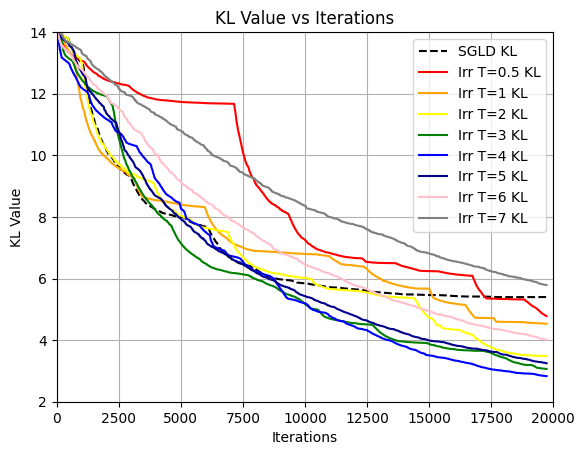

In [20]:
# 绘制变化图
plt.clf()
plt.plot(iterations, sgld_kl_value, label='SGLD KL', color="black", linestyle='--')
plt.plot(iterations, irr_1, label='Irr T=0.5 KL', color="red")
plt.plot(iterations, irr_2, label='Irr T=1 KL', color="orange")
plt.plot(iterations, irr_3, label='Irr T=2 KL', color="yellow")
plt.plot(iterations, irr_4, label='Irr T=3 KL', color="green")
plt.plot(iterations, irr_5, label='Irr T=4 KL', color="blue")
plt.plot(iterations, irr_6, label='Irr T=5 KL', color="darkblue")
plt.plot(iterations, irr_7, label='Irr T=6 KL', color="pink")
plt.plot(iterations, irr_8, label='Irr T=7 KL', color="grey")

# 添加标签和标题
plt.xlabel('Iterations')
plt.xlim(0,20000)
plt.ylabel('KL Value')
plt.ylim(2,14)
plt.title('KL Value vs Iterations')
plt.legend()  # 显示图例
plt.grid(True)
plt.show()